#  CODE FOR MULTIVARIATE GP REGRESSION WITH ARD-SE KERNEL- Aditya
## Introduction to Gaussian process:

* A Multivariate Gaussian  is defined on a domain $\chi = \mathbb{R}^N$ with mean  $\mathbf{\mu}:\chi \Rightarrow \mathbb{R}$ and covariance  $K:\chi \times \chi \Rightarrow \mathbb{R}$, such that any the probability density function of any random vector $\mathbf{y} \in \chi $ is given as
\begin{align}
p(\mathbf{y})=\dfrac{1}{(2\pi)^{1/2} |K|^{1/2}} \times \exp(\dfrac{(\mathbf{y}-\mu\mathbf{1})^TK^{-1}(\mathbf{y}-\mu\mathbf{1})}{2})
\end{align}

* The variable $\mathbf{y}$ is then represented as a 
\begin{align}
\mathbf{y} \sim \mathcal{N} (\mathbf{\mu},K)
\end{align}


## Conditional distribution

* One very attractive property of the GP is that, it is closed under *conditioning*. 
* Specifically, the conditional distribution of query points given a set of control points obtained from the joint Gaussian of the training and test points is *also a Gaussian distribution*

* Consider two sets of normally distributed random vectors $\mathbf{y_1}$ and $\mathbf{y_2}$, respectively. The joint distribution of the training and test points is given by the joint MVG (**M**ulti-**V**ariate  **G**aussian) distribution as

\begin{align}
\begin{bmatrix}
\mathbf{y_1} \\\mathbf{y_2}
\end{bmatrix} =   \mathcal{N}_{n_1+n_2}(\begin{bmatrix}
\mathbf{\mu_1} \\\mathbf{ \mu_2}
\end{bmatrix},
\begin{bmatrix}
K_{11} && K_{12}\\K_{21} && K_{22}
\end{bmatrix}
)
\end{align}

* Then, the *conditional distribution of* $\mathbf{y_2}$*given* $\mathbf{y_1}$ is given as

\begin{align}
p(\mathbf{y_2} |\mathbf{y_1})
 =   \mathcal{N}_{n_2}(\mu_2+K_{21}K_{11}^{-1}(\mathbf{y_1}-\mathbf{\mu_1}),(K_{22}-K_{21}K_{11}^{-1}K_{12})
)
\end{align}

* Consider $\mathbf{y_1},\mathbf{y_2}$ as training and query point $\mathbf{y},\mathbf{f_*}$

## What is a Gaussian process?
* Instead of inferring a distribution over the parameters of a parametric function Gaussian processes can be used to infer a distribution over functions directly, by applying the properties of the multi-variate Gaussian discussed above. 
* A Gaussian process defines a prior over functions. After having observed some function values it can be converted into a posterior over functions. 
* Inference of continuous function values over the domain of interest in this context is known as GP regression but GPs.

* A Gaussian process is a [random process](https://en.wikipedia.org/wiki/Stochastic_process) where any point $\mathbf{x} \in \mathbb{R}^p$ is assigned a random variable $f(\mathbf{x})$ and where the joint distribution of a finite number of these variables $p(f(\mathbf{x}_1),...,f(\mathbf{x}_N))$ is itself Gaussian:

$$p(\mathbf{f} \lvert \mathbf{X}) = \mathcal{N}(\mathbf{f} \lvert \boldsymbol\mu, \mathbf{K})\tag{1}\label{eq1}$$

* In Equation $(1)$, $\mathbf{f} = (f(\mathbf{x}_1),...,f(\mathbf{x}_N))$, $\boldsymbol\mu = (m(\mathbf{x}_1),...,m(\mathbf{x}_N))$ and $K_{ij} = \kappa(\mathbf{x}_i,\mathbf{x}_j)$. $m$ is the mean function and it is common to use $m(\mathbf{x}) = 0$ as GPs are flexible enough to model the mean arbitrarily well. 
* $\kappa$ is a positive definite *kernel function* or *covariance function*. 
* Thus, a Gaussian process is a distribution over functions whose shape (smoothness, ...) is defined by $\mathbf{K}$. If points $\mathbf{x}_i$ and $\mathbf{x}_j$ are considered to be similar by the kernel the function values at these points, $f(\mathbf{x}_i)$ and $f(\mathbf{x}_j)$, can be expected to be similar too. 
* A GP prior $p(\mathbf{f} \lvert \mathbf{X})$ can be converted into a GP posterior $p(\mathbf{f} \lvert \mathbf{X},\mathbf{y})$ after having observed some data $\mathbf{y}$. The posterior can then be used to make predictions $\mathbf{f}_*$ given new input $\mathbf{x}_*$:

$$
\begin{align*}
p(\mathbf{f}_* \lvert \mathbf{x}_*,\mathbf{X},\mathbf{y}) 
&= \int{p(\mathbf{f}_* \lvert \mathbf{x}_*,\mathbf{f})p(\mathbf{f} \lvert \mathbf{X},\mathbf{y})}\ d\mathbf{f} \\ 
&= \mathcal{N}(\mathbf{f}_* \lvert \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_*)\tag{2}\label{eq2}
\end{align*}
$$

* Equation $(2)$ is the posterior predictive distribution which is also a Gaussian with mean $\boldsymbol{\mu}_*$ and $\boldsymbol{\Sigma}_*$. By definition of the GP, the joint distribution of observed data $\mathbf{y}$ and predictions $\mathbf{f}_*$  is

$$
\begin{pmatrix}\mathbf{y} \\ \mathbf{f}_*\end{pmatrix} \sim \mathcal{N}
\left(\boldsymbol{0},
\begin{pmatrix}\mathbf{K}_y & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{pmatrix}
\right)\tag{3}\label{eq3}
$$

* With $N$ training data and $N_*$ new input data, $\mathbf{K}_y = \kappa(\mathbf{X},\mathbf{X}) + \sigma_y^2\mathbf{I} = \mathbf{K} + \sigma_y^2\mathbf{I}$ is $N \times N$, $\mathbf{K}_* = \kappa(\mathbf{X},\mathbf{x}_*)$ is $N \times N_*$ and $\mathbf{K}_{**} = \kappa(\mathbf{X}_*,\mathbf{x}_*)$ is $N_* \times N_*$. $\sigma_y^2$ is the noise term in the diagonal of $\mathbf{K_y}$. It is set to zero if training targets are noise-free and to a value greater than zero if observations are noisy. The mean is set to $\boldsymbol{0}$ for notational simplicity. The sufficient statistics of the posterior predictive distribution, $\boldsymbol{\mu}_*$ and $\boldsymbol{\Sigma}_*$, can be computed with<sup>[1][3]</sup>

$$
\begin{align*}
\boldsymbol{\mu_*} &= \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{y}\tag{4}\label{eq4} \\
\boldsymbol{\Sigma_*} &= \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{K}_*\tag{5}\label{eq5}
\end{align*}
$$


## Covariance matrices
* Normally, the function space realizations $\mathbf{y}$ are generated by simulations or experiments and have unknown dependencies on the input parameters/features. Typically, these dependencies are highly non-linear and ascertaining them with only fixed set of parameters is a highly time-consuming process that involves parameter selection, validation. 
* GPs (or linear Gaussian models) have the flexibility of augmenting the predictive response given new data-points quite naturally by enlarging the dimensionality of the MVG. 
* Note that this non-parametric form asymptotically converges to the true underlying distribution. However, with a finite number of data-points, the entries in the covariance matrix strongly control the surrogate fidelity. 
* Therefore, choosing the appropriate structure for the covariance ($K$) matrix and the relevant parameters therein is crucial to building GP predictive models with sufficient accuracy. 
* A *kernel function* is used to compute the $K$ matrices. The kernel function is designed to capture the stronger correlation of outputs corresponding to closely spaced inputs. 
* Perhaps the simplest choice of a *stationery* kernel is the squared-exponential kernel , also known as Gaussian kernel or RBF kernel:

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j))\tag{6}
$$

The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel). 
* A popular choice for the kernel function is the Automatic Relevance Determination-Squared-Exponential (ARD-SE) kernel
$K(x^i,x^j )=\sigma^2  \exp( -\sum_{k=1}^p \beta_k  (x^i_k-x^j_k )^2 )$, more compactly represented as 
$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-
  (\mathbf{x}_i - \mathbf{x}_j)^T\mathbf{\beta}
  (\mathbf{x}_i - \mathbf{x}_j))\tag{7}
$$
* Where the $(x^i)$ are input points arranged as column vectors $(x^i_1,x^i_2...,x^i_p)^T$ with 'p' features
* The term $\sigma^2$ is called the precision of the GP and the parameters $\beta_k|_{i=1}^p$ are called "correlation parameters"

In [1]:
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes 
    a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

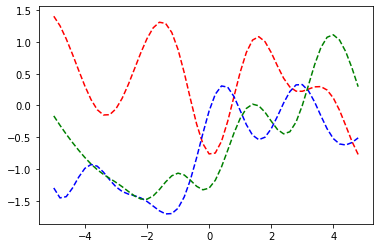

In [2]:
%matplotlib inline

# from gaussian_processes_util import plot_gp

# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov,3)

# Plot GP mean, confidence interval and samples 

import matplotlib.pyplot as plt

plt.plot(X,samples[0,:],'r--')
plt.plot(X,samples[1,:],'b--')
plt.plot(X,samples[2,:],'g--')

### Prediction from noise-free training data

To compute the sufficient statistics i.e. mean and covariance of the posterior predictive distribution we implement Equations $(4)$ and $(5)$

In [3]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

In [4]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
stdev=np.diag(cov_s)
mu_s=mu_s.reshape((mu_s.shape[0],))

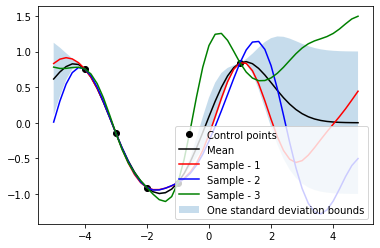

In [5]:
plt.plot(X_train,Y_train,'ko')
plt.fill_between(X.reshape((X.shape[0],)),mu_s-stdev,mu_s+stdev,alpha=0.25)
plt.plot(X,mu_s,'k')

plt.plot(X,samples[0,:],'r')
plt.plot(X,samples[1,:],'b')
plt.plot(X,samples[2,:],'g')
plt.legend(('Control points','Mean','Sample - 1','Sample - 2','Sample - 3','One standard deviation bounds',))


### Prediction from noisy training data

If some noise is included in the model, training points are only approximated and the variance at the training points is non-zero.

In [ ]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
stdev=np.diag(cov_s)
mu_s=mu_s.reshape((mu_s.shape[0],))

In [ ]:
plt.plot(X_train,Y_train,'ko')
plt.fill_between(X.reshape((X.shape[0],)),mu_s-stdev,mu_s+stdev,alpha=0.25)
plt.plot(X,mu_s,'k')

plt.plot(X,samples[0,:],'r')
plt.plot(X,samples[1,:],'b')
plt.plot(X,samples[2,:],'g')
plt.legend(('Control points','Mean','Sample - 1','Sample - 2','Sample - 3','One standard deviation bounds',))

### Effect of kernel parameters and noise parameter

The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

In [ ]:
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(20, 8))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    stdev=np.diag(cov_s)
    mu_s=mu_s.reshape((mu_s.shape[0],))
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plt.plot(X_train,Y_train,'ko')
    plt.fill_between(X.reshape((X.shape[0],)),mu_s-3*stdev,mu_s+3*stdev,alpha=0.25)
    plt.plot(X,mu_s,'k')

    plt.plot(X,samples[0,:],'r')
    plt.plot(X,samples[1,:],'b')
    plt.plot(X,samples[2,:],'g')
    plt.legend(('Control points','Mean','Sample - 1','Sample - 2','Sample - 3','One standard deviation bounds',))

## Bayesian estimation of GP parameters
* Once the kernel function that generates the entries of the covariance matrix is chosen, the estimation of the hyper-parameters within it need to be determined. We will denote the set of hyper-paramaters as $\Theta = \{\mu,\sigma^2,\beta_k|_{i=1}^p\}$ or just $\Theta = \{\sigma_f^2,l\}$
* For that purpose, we will calculate the posterior distribution of the hyper-parameters for the given data points by marginalizing the log-likelihood w.r.t the prior assumptions we have about the hyperparameters. The above statement can be expressed mathematically as
\begin{align}
p(\Theta|\mathbf{y}) = \int p(\mathbf{y}|\mathbf{X},\Theta)p(\Theta)d\Theta
\end{align}
* The conjugate-prior for sampling the GP posterior distribution for the hyperparameters is usually taken as $inv-\Gamma$ or  inverse-Gamma distribution. This represents the GP generative process in a full Bayesian setup
* However, the analytical integral is typically intractable, therefore in a full-Bayesian formulation, one must resort to MCMC samplers to estimate the posterior PDFs of the hyperparameters. 

## MLE estimation
* In most cases, the hyperparameters do not have strong priors (or equivalently, $p(\Theta) \propto 1$), therefore estimating the posterior of the hyperparameters is the same as maximizing the $p(\mathbf{y}|\mathbf{X},\Theta)$, which is also called the likelihood function. 
* The Maximum Likelihood Estimate (MLE) is obtained by maximizing the following function

\begin{align}
\log{p(\mathbf{y})}=\dfrac{n}{2}\log{(\pi)} -1/2\log{|K|} - \dfrac{(\mathbf{y}-\mu\mathbf{1})^TK^{-1}(\mathbf{y}-\mu\mathbf{1})}{2}
\end{align}

* Or equivalently, minimizing the following function,
\begin{align}
\mathcal{L} = -2\log{p(\mathbf{y})}=\log{|K|} + (\mathbf{y}-\mu\mathbf{1})^TK^{-1}(\mathbf{y}-\mu\mathbf{1})
\end{align}

In [ ]:
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) 
noise=1e-2

def nll_fn(X_train, Y_train, noise, naive=True):
    '''
    Returns a function that computes the negative marginal log-
    likelihood for training data X_train and Y_train and given 
    noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if 
               False use a numerically more stable implementation. 
        
    Returns:
        Minimization objective.
    '''
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples 
        # in this article but is numerically less stable compared to 
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    
    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)

In [ ]:
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
stdev=np.diag(cov_s)
mu_s=mu_s.reshape((mu_s.shape[0],))
plt.plot(X_train,Y_train,'ko')
plt.fill_between(X.reshape((X.shape[0],)),mu_s-3*stdev,mu_s+3*stdev,alpha=0.25)
plt.plot(X,mu_s,'k')

plt.plot(X,samples[0,:],'r')
plt.plot(X,samples[1,:],'b')
plt.plot(X,samples[2,:],'g')
plt.legend(('Control points','Mean','Sample - 1','Sample - 2','Sample - 3','One standard deviation bounds',))

* For the ARD kernel, the entries in the covariance matrix is defined as follows:
\begin{align}
K(i,j)=\sigma^2\exp(-\sum_{k=1}^p \beta_k (X^i_k-X^j_k)^2) = \sigma^2 R(i,j)
\end{align}

* The MLE estimate of the mean for a constant mean GP is calculated by setting $\dfrac{\partial \mathcal{L}}{\partial \mu}=0$
\begin{align}
\hat{\mu} = \dfrac{\mathbf{1}^TR^{-1}\mathbf{y}}{\mathbf{1}^TR^{-1}\mathbf{1}}
\end{align}

* The MLE estimate of the precision for a constant mean GP is calculated by setting $\dfrac{\partial \mathcal{L}}{\partial \sigma^2}=0$ and using the mean value from the previous equation
\begin{align}
\hat{\sigma^2} = \dfrac{1}{n}( (\mathbf{y}-\mu\mathbf{1})^TR^{-1}(\mathbf{y}-\mu\mathbf{1}))
\end{align}

* The negative Log-likelihood can therefore be equivalently expressed (after ignoring the constant terms) as
\begin{align}
\mathcal{L}=n\log{\hat{\sigma^2}}+\log{|R|} + \dfrac{(\mathbf{y}-\mu\mathbf{1})^TR^{-1}(\mathbf{y}-\mu\mathbf{1})}{\hat{\sigma^2}}
\end{align}
* Using the MLE of $\sigma^2=\hat{\sigma^2}$, we can see that the  last  term  also  becomes  $\it{constant}$. Note that in the above two equations, the MLE estimates are $\it{functions}$ of the correlation parameters $\beta_k|_{i=1}^p$. Therefore, the optimization procedure needs to be done with only the correlation parameters. 

### CODE REQUIREMENTS
The code requires the following packages to be installed (all of which can be done from *pip* as well as the official conda-forge channel)
1. pymc3
2. theano
3. libpython (note that if you're running from linux, you *probably* don't need this - theano data-structures (so-called tensors) are only compatible with 32-bit GNU C++ and not MinGW-64/CYGWin-x86-64 architectures . To use native python C++-BLAS libraries instead, we install libpython. It is *slightly* slower than bare-bones C++ implementation
4. GPy
5. pandas - already available from conda installation, if you're using conda

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math


## Creating a class object that can perform GP regression
* The class object is called "GProcess" and it doesn't have an init module so variable assignment within the object must be done after instantiation
* The $1^{st}$ module ("set_training_data") requries inputs: $\mathbf{X}$, $\mathbf{y}$, and optionally, initial values of the correlation parameters. Note that this can handle both univariate as well as multi-variate regression
* The $2^{nd}$ module ("get_dist_matrix") is the ARD_SE/anisotropic rbf-basis generator for the input matrix $\mathbf{X}$. It can optionally also calculate a generally non-symmetric rbf-basis *between* two matrices (say train and test) through optional argument $\mathbf{X_2}$ (default $\mathbb{None}$)
* The $3^{rd}$ module ("log_likelihood") calculates the negative log likelihood in order to be supplied to *scipy.optimize.minimize*. The expression doesn't consider the constant terms
* The $4^{th}$ module calculates the gradient of the log-likelihood function w.r.t $\Theta=\{\beta_k,\mu,\sigma^2\}$
* The $5^{th}$ ("optimizer_GP")module optimizes the hyperparameters $\beta_k|_{i=1}^p$ and subsequently calculates $\hat{\mu}\, and\, \hat{\sigma^2}$ and stores them as object *self* variables. 
* The $6^{th}$ ("optimized_GP")module assigns the object variables to values obtained when evaluated *at* the optimal hyperparameter values. Specifically, it assigns the rbf-basis matrix  and objective minimum of marginal log-likelihood
* The $7^{th}$ ("predict_GP") module is for predicting responses for test-set data points

In [ ]:
import sys
sys.version


In [ ]:
# In[18]:
class GProcess():
    X=[]
    y=[]
    n=[]
    mu=[]
    sigma2=[]
    beta=[]
    Rmat=[]
    Rinv=[]
    dev=[]
    model=[]
    logl=[]
    nfeat=[]
    nugget=[]
    mahalanobis=[]
    def set_training_data(self,X,y,beta_i=None,nugget=None):
        if(X.ndim==2):
            self.X=np.copy(X)
            pass
        else:
            self.X=np.zeros((len(X),1))
            self.X[:,0]=X        
        self.y=y.reshape((len(y),1))
        self.n=self.X.shape[0]
        self.nfeat=self.X.shape[1]
        if(beta_i is None):
            self.beta=np.ones((self.nfeat,))*1.0
        else:
            self.beta=beta_i
        #Initial values of mu and sigma2
        self.mu=np.average(y)
        self.sigma2=(np.std(y))**2
        #Nuggets stabilize the cholesky-decomposition of the "rmat" matrix requried for inverse calculation
        self.nugget=nugget or 1e-10
    def get_dist_matrix(self,X,beta,X2=None,return_dmat=False):
        if(X2 is None):
            X2=np.copy(X)
        rmat=np.zeros((X.shape[0],X2.shape[0]))
        dmat=np.zeros((X.shape[0],X2.shape[0]))
        
        for i in range(X.shape[0]):
            for j in range(X2.shape[0]):
                if(hasattr(beta, "__len__")):#Checking if it is univariate or multivariate regression
                    for k in range(len(beta)):
                        rmat[i,j]=rmat[i,j]-beta[k]*(X[i,k]-X2[j,k])**2
                        dmat[i,j]=dmat[i,j]+(X[i,k]-X2[j,k])**2
                else:
                    rmat[i,j]=rmat[i,j]-beta*(X[i]-X2[j])**2
                    dmat[i,j]=dmat[i,j]+(X[i]-X2[j])**2
        rmat=np.exp(rmat)
        if(return_dmat):
            return(rmat,dmat)
        else:
            return(rmat)
    def log_likelihood(self,beta):
        lenb=len(beta)
        onen=np.ones((self.n,1))
        rmat=self.get_dist_matrix(self.X,beta)
        rinv=np.linalg.inv(rmat+self.nugget*np.eye(self.n))
        rinv=1/2*(rinv+rinv.T)
        det_rmat=abs(np.linalg.det(rmat+self.nugget*np.eye(self.n)))
        mu=(np.dot(np.matmul(onen.T,rinv),self.y))/(np.dot(np.matmul(onen.T,rinv),onen))
        dev=self.y-mu*onen
        sigma2=1/self.n*(np.dot(np.matmul(dev.T,rinv),dev))
        logl=self.n*np.log(abs(sigma2))+np.log(det_rmat)
        return(logl)
    def log_likelihood_grad(self,beta):
        lenb=len(beta)
        onen=np.ones((self.n,1))
        rmat=self.get_dist_matrix(self.X,beta)
        rinv=np.linalg.inv(rmat+self.nugget*np.eye(self.n))
        rinv=1/2*(rinv+rinv.T)
        onen=np.ones((self.n,1))
        mu=(np.dot(np.matmul(onen.T,rinv),self.y))/(np.dot(np.matmul(onen.T,rinv),onen))
        dev=self.y-mu*onen
        sigma2=1/self.n*(np.dot(np.matmul(dev.T,rinv),dev))
        Mvec=np.matmul(rinv,dev)    
        
        grad_logl=np.zeros((lenb,))
        for k in range(lenb):
            rmat_k,dmat_k=self.get_dist_matrix(self.X[:,k],beta[k], return_dmat=True)
            KDmat=np.multiply(rmat,dmat_k)
            gbk1=-np.trace(np.matmul(rinv,KDmat))
            gbk2=1/sigma2*np.dot(np.matmul(Mvec.T,KDmat),Mvec)
            grad_logl[k]=gbk1+gbk2
        return grad_logl
        
    def optimize_GP(self,n_restarts=6):
        func0=self.log_likelihood
        grad0=self.log_likelihood_grad
        optvar=np.zeros((self.nfeat,))#nfeat for correlation parameters,1 for precision,1 for mean
        bounds=[]
        for ii in range(self.nfeat):
            bounds.append((1e-8,1e8))

        bounds=tuple(bounds)#The minimize function requires bounds in the form of a tuple
        print(bounds)#TO check the bounds: mu can be anything, sigma2>0 and beta[:]>0
        
        print("optimization run starting - Initial beta:%s"%(self.beta))
        res_points=np.arange(-n_restarts//2+1,n_restarts//2+1)
        logl=np.zeros(n_restarts)
        beta=np.zeros((n_restarts,self.nfeat))
        indx=[]
        for i in range(n_restarts):
            count=0
            optvar=self.beta*(10.0**(res_points[i]))
            #'jac' option can be toggled with grad0 or None if you wanna try out using inbuilt numerical jacobian
            optObj=optimize.minimize(func0,optvar,method='L-BFGS-B',bounds=bounds ,jac=grad0,\
                                 options={'disp': None, 'maxcor': 25, 'ftol': 2.220446049250313e-06, \
                                          'gtol': 1e-03, 'eps': 1e-06, 'maxfun': 50, 'maxiter': 50,\
                                          'iprint': -1, 'maxls': 40})
            
            logl[i]=optObj.fun
            beta[i,:]=optObj.x
            if(math.isinf(logl[i])):
                pass
            else:
                indx.append(i)
            
            print(optObj.message)
            print(optObj.success)
        logl=logl[indx]
        beta=beta[indx,:]
            
        self.beta=np.copy(beta[np.argmin(logl),:])
        print("optimization run ended - Optimized value of beta:%s"%(self.beta))
        self.optimized_GP()
    def optimized_GP(self):
        self.Rmat=self.get_dist_matrix(self.X,self.beta)
        self.Rinv=np.linalg.inv(self.Rmat+self.nugget*np.eye(self.n))
        self.Rinv=1/2*(self.Rinv+self.Rinv.T)
        onen=np.ones((self.n,1))
        self.mu=(np.dot(np.matmul(onen.T,self.Rinv),self.y))/(np.dot(np.matmul(onen.T,self.Rinv),onen))
        self.dev=self.y-self.mu*onen
        self.sigma2=1/self.n*(np.dot(np.matmul(self.dev.T,self.Rinv),self.dev))
        self.model=np.matmul(self.Rinv,self.dev)
        self.mahalanobis=np.dot(np.matmul(self.dev.T,self.sigma2*self.Rinv),self.dev)
        self.logl=self.n*np.log(abs(self.sigma2))+ np.log(abs(np.linalg.det(self.Rmat+self.nugget*np.eye(self.n))))
    def predict_GP(self,Xt0,return_std=False):
        if(Xt0.ndim==2):
            Xt=np.copy(Xt0)
            pass
        else:
            Xt=Xt0.reshape((len(Xt0),1))
        rxt=self.get_dist_matrix(Xt,self.beta,self.X)
        onen=np.ones((self.n,1))
        meanxt=np.zeros((Xt.shape[0],1))
        varxt=np.zeros((Xt.shape[0],1))
        for i in range(Xt.shape[0]):
            rxi=rxt[i,:].T
            meanxt[i]=(self.mu+np.matmul(rxi.T,self.model))
            varxt[i]=self.sigma2*(1-np.dot(np.matmul(rxi.T,self.Rinv),rxi))#+ \
        if(return_std):
            return meanxt,varxt
        else:
            return meanxt



## Testing out the GP process for multivariate regression with Franke's function

* The Franke's function is a standard performance benchmark for 2-d surrogate models. It is given as 
\begin{align}
f(\mathbf{x})=\dfrac{3}{4}\exp{(-\dfrac{1}{4}(9x_1-2)^2-\dfrac{1}{4}(9x_2-2)^2)}+\\ \dfrac{3}{4}\exp{(-\dfrac{1}{49}(9x_1+1)^2-\dfrac{1}{10}(9x_2+1)^2)}+\\ \dfrac{1}{2}\exp{(-\dfrac{1}{4}(9x_1-7)^2-\dfrac{1}{4}(9x_2-3)^2)}-   \\        \dfrac{1}{5}\exp{(-\dfrac{1}{4}(9x_1-4)^2-\dfrac{1}{4}(9x_2-7)^2)}
\end{align}

* The training set is a random 2-D matrix from $(0,1) \times (0,1)$. The output is calibrated using the following variables: $\{\beta_1,\beta_2,\mu,\sigma^2\}$. 
* The training and test results are shown below:

In [ ]:
def testfuncgp():
    sin=np.sin
    cos=np.cos

    def f(X):
        out=[]
        X=list(X)
        for x in X:
            out.append((sin(30*(x-0.9)**4))*cos(2*(x-0.9))+(x-0.9)/2)
        out=np.array(out).reshape((len(out),1))
        return(out)
    def f2d(X):
        out=np.zeros(X.shape[0],)
        for i in range(X.shape[0]):
            x1=X[i,0]
            x2=X[i,1]
            out[i]=3/4*np.exp(-1/4*(9*x1-2)**2-1/4*(9*x2-2)**2)+3/4*np.exp(-1/49*(9*x1+1)**2-1/10*(9*x2+1)**2)+\
            2/4*np.exp(-1/4*(9*x1-7)**2-1/4*(9*x2-3)**2)-1/5*np.exp(-1/1*(9*x1-4)**2-1/1*(9*x2-7)**2)
        return(out)
    return(f2d)
    


In [ ]:
gen_data=testfuncgp()
np.random.seed(4567)
from pyDOE import *
X=lhs(n=2,samples=100,criterion='corr')
X.shape



In [ ]:
y=gen_data(X)

In [ ]:
gp=GProcess()
gp.set_training_data(X=X,y=y,nugget=1e-6)

In [ ]:
gp.optimize_GP()
gp.logl

## Optimized GP hyperparameters
* The correlation parameters $\beta_1,\beta_2$, the mean $\hat{\mu}$ and precision $\sigma_2$ are shown below. 
* A higher $\sigma^2$ indicates that the uncertainty predictions are higher ( generally)
* The correlation parameters indicate the first feature is more important than the second one

In [ ]:
print("Correlation parameters:")
print(gp.beta)
print("\n")

print("Mean:")
print(gp.mu)
print("\n")

print("Precision:")
print(gp.sigma2)
print("\n")

#print(gp1.beta)



## GP predictive response
* A contour plot is generated for a 2-D region: $(0,1) \times (0,1)$. Apart from some outlier points in the corners of this region, we can see that the GP predicts the Franke's function benchmark pretty well

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
Xt=np.column_stack([np.linspace(0,1,50).T,np.linspace(0,1,50).T])
x1t,x2t=np.meshgrid(Xt[:,0],Xt[:,1])
y_2dt=np.zeros((Xt.shape[0],Xt.shape[0]))
for i in range(Xt.shape[0]):
    for j in range(Xt.shape[0]):
        y_2dt[i,j]=gen_data(np.array([x1t[i,j],x2t[i,j]]).reshape((1,2)))

x1t,x2t=np.meshgrid(Xt[:,0],Xt[:,1])
y_2dp=np.zeros((Xt.shape[0],Xt.shape[0]))
y_2ds=np.zeros((Xt.shape[0],Xt.shape[0]))

for i in range(Xt.shape[0]):
    for j in range(Xt.shape[0]):
        y_2dp[i,j],y_2ds[i,j]=gp.predict_GP(np.array([x1t[i,j],x2t[i,j]]).reshape((1,2)),return_std=True)       


fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(20,5))

axlist = [ax1,ax2]
ax1.set_title('Ground truth')
ax2.set_title('GP prediction')


fig1 = ax1.contourf(x1t,x2t,y_2dt, vmin=-0.2, vmax=1.2)
fig2 = ax2.contourf(x1t,x2t,y_2dp, vmin=-0.2, vmax=1.2)


fig.colorbar(fig1, ax=axlist)
plt.scatter(X[:,0],X[:,1],color='k')
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

### USING GPy TO CALIBRATE THE FRANKE'S FUNCTION MODEL:
* The code GPy is maintained by Sheffield University and is available from conda-forge
* The structure of GPy is very similar to the GP seen above; you can choose a kernel from a SE,ARD-SE,Matern32,Matern52,WhiteNoise or any mixture (sum/product) of the above.
* Note that this package considers length-scales instead of correlation parameters. The kernels are of the form
\begin{align}
K(x_i,x_j) = \exp(-\dfrac{1}{2}\sum_{k=1}^p(\dfrac{x_{ik}-x_{jk}}{l_k})^2)
\end{align}
* You need to provide the *input_dims*, initial value of the GP precision (called "variance" in this package) and a flag ARD to indicate if you want individual  
* You can then setup the training data and optimize the GP; allowing the GPy module to show you the optimization steps will help you visualize the convergence

In [ ]:
import GPy
kernfranke=GPy.kern.RBF(input_dim=2,ARD=True)
gpf=GPy.models.GPRegression(X,y.reshape((len(y),1)),kernfranke)#Requires 2-D arrays for outputs as well;
#allows it to handle multiple-output GP regression
display(gpf)

In [ ]:
gpf.optimize(messages=True)

* From the above display, it is clear that the optimizer has converged within 30 seconds with an objective function value of -238.4 and gradient of 1.14E-08. We can check the RHS table to see the variance of the GP as well as the noise term added for stabilization.
* The lengthscale parameters can be visualized as



In [ ]:
gpf.kern.lengthscale

### VALIDATING THE GPy MODEL WITH FRANKE'S FUNCTION

In [ ]:
y_2dpf=np.zeros((Xt.shape[0],Xt.shape[0]))
y_2dsf=np.zeros((Xt.shape[0],Xt.shape[0]))

for i in range(Xt.shape[0]):
    for j in range(Xt.shape[0]):
        y_2dpf[i,j],y_2dsf[i,j]=gpf.predict(np.array([x1t[i,j],x2t[i,j]]).reshape((1,2)))       


fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(20,5))

axlist = [ax1,ax2]
ax1.set_title('Ground truth')
ax2.set_title('GP prediction')


fig1 = ax1.contourf(x1t,x2t,y_2dt, vmin=-0.2, vmax=1.2)
fig2 = ax2.contourf(x1t,x2t,y_2dpf, vmin=-0.2, vmax=1.2)


fig.colorbar(fig1, ax=axlist)
plt.scatter(X[:,0],X[:,1],color='k')
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

### Appendix - 1 Analytical Jacobian for the ARD-SE kernel
* The usage of analytical Jacobian speeds up optimization significantly. The gradient of the Log-likelihood w.r.t $\beta_k|_{i=1}^p$ is

\begin{align}
\dfrac{\partial \mathcal{L}}{\partial \beta_k}=\frac{n}{\hat{\sigma^2}}\dfrac{\partial \hat{\sigma^2} }{\partial \beta_k}+\dfrac{\partial \log{|R|}}{\partial \beta_k}
\end{align}

* The first term is computed as
\begin{align}
\frac{n}{\hat{\sigma^2}} \dfrac{\partial \hat{\sigma^2} }{\partial \beta_k} = \frac{n}{\hat{\sigma^2}} \dfrac{\partial (\dfrac{1}{n}( (\mathbf{y}-\mu\mathbf{1})^TR^{-1}(\mathbf{y}-\mu\mathbf{1})))}{\partial \beta_k} =\dfrac{1}{\hat{\sigma^2}} \dfrac{\partial }{\partial \beta_k}((\mathbf{y}-\mu\mathbf{1})^TR^{-1}(\mathbf{y}-\mu\mathbf{1}))=\\
\dfrac{1}{\hat{\sigma^2}}\dfrac{\partial }{\partial \beta_k}(\mathbf{y}^TR^{-1}\mathbf{y}-2\mu\mathbf{1}^TR^{-1}\mathbf{y}+\mu^2\mathbf{1}^TR^{-1}\mathbf{1})=\\
\dfrac{1}{\hat{\sigma^2}}\dfrac{\partial }{\partial \beta_k}(\mathbf{y}^TR^{-1}\mathbf{y}-\dfrac{(\mathbf{1}^TR^{-1}\mathbf{y})^2}{\mathbf{1}^TR^{-1}\mathbf{1})})=\\
\dfrac{1}{\hat{\sigma^2}}(\mathbf{y}^T\dfrac{\partial R^{-1}}{\partial \beta_k}\mathbf{y} - \dfrac{\partial }{\partial \beta_k} (\dfrac{(\mathbf{1}^TR^{-1}\mathbf{y})^2}{\mathbf{1}^TR^{-1}\mathbf{1})}))=\\
\dfrac{1}{\hat{\sigma^2}}(\mathbf{y}-\mu\mathbf{1})^T \dfrac{\partial R^{-1}}{\partial \beta_k}(\mathbf{y}-\mu\mathbf{1})
\end{align}
* The term $\dfrac{\partial R^{-1}}{\partial \beta_k}$ in the above expression can be simplified into

\begin{align}
\dfrac{\partial R^{-1}}{\partial \beta_k} = -R^{-1} \dfrac{\partial R}{\partial \beta_k} R^{-1}
\end{align}

* The second term is computed as
\begin{align}
\dfrac{\partial \log{|R|}}{\partial \beta_k} = tr(R^{-1}\dfrac{\partial R}{\partial \beta_k})
\end{align}

* For the ARD kernel, since $R(i,j) = \exp(-\sum_{k=1}^p \beta_k (X^i_k-X^j_k)^2)$, we can estimate $\dfrac{\partial R}{\partial \beta_k}$ as 

\begin{align}
\dfrac{\partial R}{\partial \beta_k}_{,ij} = - R(i,j) (X^i_k-X^j_k)^2 =- R \odot D_K^2 
\end{align}

* The term $D_K^2$ is the distance matrix of *only* the k-th feature and the term $R \odot D_K^2$ is called the $\it{Hadamard}$ product (element-wise matrix multiplication) and is easily available in most matrix computation packages. For instance, in numpy it is *numpy.multiply*. Note that the Hadamard product is not associative
* The overall gradient of the negative log-likelihood w.r.t the correlation parameters is therefore expressed as
\begin{align}
\dfrac{\partial \mathcal{L}}{\partial \beta_k}=-\dfrac{1}{\hat{\sigma^2}}(\mathbf{y}-\mu\mathbf{1})^T R^{-1}\dfrac{\partial R}{\partial \beta_k}R^{-1}(\mathbf{y}-\mu\mathbf{1})+tr(R^{-1}\dfrac{\partial R}{\partial \beta_k})=\\
\dfrac{1}{\hat{\sigma^2}}(\mathbf{y}-\mu\mathbf{1})^T R^{-1}( R \odot D_K^2) R^{-1}(\mathbf{y}-\mu\mathbf{1})-tr(R^{-1} (R \odot D_K^2) )
\end{align}